# Describing Distributions

measure of central tendency:  
- mean
- median
- mode

measure of dividing up distributions:  
- quantiles, most common ones are *percentiles*, *quartiles* and *deciles* 

(see details in Introduction.ipynb)

measure of dispersion:
- variance
- standard deviation
- standard error

measure of relatedness:
- covariance
- correlation

<hr>  

#### Variance

(denoted with $\sigma^2$) can be written using expected-value notation, but it's easier to understand without it:  
\begin{align}
\tag{3.6}
\sigma^2=\frac{\textstyle\sum_{i=1}^n (x_i-\bar{x})^2}{n}
\end{align}

In [3]:
# As an example let's calculate the variance of the PDF x from earlier
import scipy.stats as st
import numpy as np

x = st.skewnorm.rvs(10, size=1000) 

In [5]:
xbar = np.mean(x)
xbar

0.8138916113921876

In [6]:
# use iterations
squared_differences = [(x_i - xbar)**2 for x_i in x]
squared_differences[0:10]

[0.7379717868274399,
 0.33967665079244463,
 0.010407785080753318,
 0.29071550095875437,
 0.6749175322121092,
 0.4471479960735701,
 0.3442412630584664,
 0.46645188143127514,
 0.07069214496595524,
 0.06188212161513694]

In [8]:
sigma_squared = sum(squared_differences)/len(x)
sigma_squared

0.39122986219711836

In [10]:
# with built-in NumPy method
np.var(x)

0.39122986219711836

#### Standard Deviation

A straightforward derivation of variance is standard deviation (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution:

\begin{align}
\tag{3.7}
\sigma=\sqrt{\sigma^2}
\end{align}

In [11]:
sigma = sigma_squared**(1/2)
sigma

0.6254837025831436

In [12]:
np.std(x)

0.6254837025831436

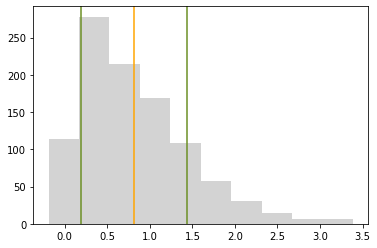

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

#### Standard Error

A further derivation of standard deviation is standard error, which is denoted with $\sigma_{\bar{x}}$:
\begin{align}
\tag{3.8}
\sigma_{\bar{x}}=\frac{\sigma}{\sqrt{n}}
\end{align}

In [15]:
sigma/(len(x))**(1/2)

0.019779531394780777

In [16]:
# sem=standard error of mean
# not exactly the same as above: 
#    because defaults to 1 degree of freedom (n-1), which can be ignored with the larger data sets
st.sem(x)

0.019789428583988956

In [17]:
# will get exactly the same value as manual calculation while setting 0 degrees of freedom (n)
st.sem(x, ddof=0)

0.019779531394780777

<hr>

#### Covariance

If we have two vectors of the same length, $x$ and $y$, where each element of $x$ is paired with the corresponding element of $y$, <strong>covariance</strong> provides a measure of how related the variables are to each other:

\begin{align}
\tag{3.9}
COV(x,y)=\frac{\textstyle\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{n}
\end{align}

In [19]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


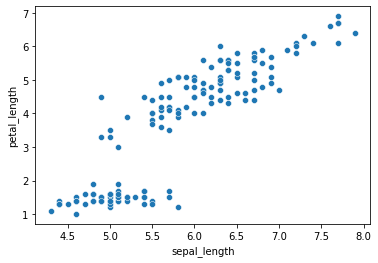

In [20]:
x = iris.sepal_length
y = iris.petal_length

_ = sns.scatterplot(x=x, y=y)

In [21]:
n = len(iris.sepal_width)

xbar = sum(x)/n
ybar = sum(y)/n

product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))

cov = sum(product)/n
cov

1.2658199999999995

In [22]:
# the NumPy cov() method returns a covariance matrix, which is 2x2 matrix because x and y together describe a two-dimensional space:
np.cov(x, y, ddof=0) # again, defaults to ddof=1

array([[0.68112222, 1.26582   ],
       [1.26582   , 3.09550267]])

The diagonal elements of the covariance matrix represent the variance of x and y, respectively:

In [23]:
np.var(x)

0.6811222222222223

In [24]:
np.var(y)

3.0955026666666665

If $x$ and $y$ are inversely related, their covariance is negative. The less related they are, the closer their covariance is to zero:

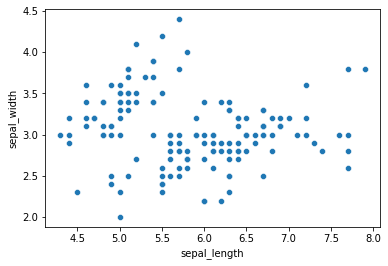

In [26]:
_ = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width)

In [27]:
np.cov(iris.sepal_length, iris.sepal_width, ddof=0)

array([[ 0.68112222, -0.04215111],
       [-0.04215111,  0.18871289]])

<hr>

#### Correlation

A drawback of covariance is that it confounds the relative scale of two variables with a measure of the variables' relatedness. <storng>Correlation</strong> builds on covariance and overcomes this drawback via rescaling, thereby measuring relatedness exclusively. Correlation is much more common because of this difference.  
The correlation coefficient (developed by Karl Pearson in the 20th c. though known in the 19th c.) is often denoted with $r$ or $\rho$ and is defined by:

\begin{align}
\tag{3.9}
P_{x,y}=\frac{COV(x,y)}{\sigma_x \sigma_y}
\end{align}

In [29]:
cov = -0.04215111
sigma_sq_x = 0.68112222
sigma_sq_y = 0.18871289

sigma_x = sigma_sq_x**(1/2)
sigma_y = sigma_sq_y**(1/2)

cov / (sigma_x * sigma_y)

-0.11756978087951572

In [30]:
st.pearsonr(iris.sepal_length, iris.sepal_width)

(-0.11756978413300204, 0.15189826071144918)

The second value output of pearsonr is a measure of statistical significance, which we'll detail in *Intro to Stats*.

In [31]:
st.pearsonr(iris.sepal_length, iris.petal_length)[0]

0.8717537758865832

N.B.: Covariance and correlation only account for linear relationships. Two variables could be non-linearly related to each other and these metrics could come out as zero.